# Baseline Model: Classification Tree

## Load Library

In [84]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-02-26 04:54:09,901: Credentials are already in use. The existing account in the session will be replaced.


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import clone

In [9]:
df = pd.read_csv("./death_case.csv")
df.head()

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,...,share_hispanic,Race_Asian,Race_Black,Race_Hispanic,Race_Native_American,Race_Other,Race_White,threat_attack,threat_other,threat_undem
0,3,Tim Elliot,1/15/02,0,1,53.0,1,Shelton,WA,1,...,19.2,1,0,0,0,0,0,1,0,0
1,4,Lewis Lee Lembke,1/15/02,0,1,47.0,1,Aloha,OR,0,...,21.1,0,0,0,0,0,1,1,0,0
2,890,Phyllis Ilene Jepsen,10/15/02,0,1,55.0,0,Aloha,OR,1,...,21.1,0,0,0,0,0,1,0,1,0
3,5,John Paul Quintero,1/15/03,1,0,23.0,1,Wichita,KS,0,...,15.3,0,0,1,0,0,0,0,1,0
4,765,Nicholas Garner,8/15/22,0,1,26.0,1,Wichita,KS,0,...,15.3,0,0,0,0,0,1,1,0,0


In [10]:
df['signs_of_mental_illness'].unique()

array([1, 0])

In [16]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'city', 'state', 'signs_of_mental_illness', 'flee', 'body_camera',
       'Median Income', 'poverty_rate', 'percent_completed_hs', 'share_white',
       'share_black', 'share_native_american', 'share_asian', 'share_hispanic',
       'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Native_American',
       'Race_Other', 'Race_White', 'threat_attack', 'threat_other',
       'threat_undem'],
      dtype='object')

In [67]:
# change 'Median Income' column from str to float
df['Median Income'].replace({'-': None},inplace = True)
df['Median Income'].replace({'(X)': None},inplace = True)
df['Median Income'] = df['Median Income'].astype(float)

In [73]:
x_vars = ['manner_of_death','armed','age','gender','flee', 'body_camera','Median Income','poverty_rate','percent_completed_hs',
         'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Native_American','Race_Other', 'Race_White', 'threat_attack', 
         'threat_other', 'threat_undem']
X = df[x_vars]
y = df['signs_of_mental_illness']

In [24]:
X

,manner_of_death,armed,age,gender,flee,body_camera,Median Income,poverty_rate,percent_completed_hs,Race_Asian,Race_Black,Race_Hispanic,Race_Native_American,Race_Other,Race_White,threat_attack,threat_other,threat_undem
0,0,1,53.0,1,0,0,37072,28.6,80.1,1,0,0,0,0,0,1,0,0
1,0,1,47.0,1,0,0,65765,14.9,88.1,0,0,0,0,0,1,1,0,0
2,0,1,55.0,0,0,0,65765,14.9,88.1,0,0,0,0,0,1,0,1,0
3,1,0,23.0,1,0,0,45947,17.3,87.5,0,0,1,0,0,0,0,1,0
4,0,1,26.0,1,1,0,45947,17.3,87.5,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,0,1,25.0,1,0,0,32432,36.4,48.8,0,0,0,0,0,0,1,0,0
2199,0,1,31.0,1,0,0,46865,14.0,81.4,0,0,0,0,0,0,0,1,0
2200,0,1,NaN,1,0,0,34559,32.1,68.3,0,0,1,0,0,0,1,0,0
2201,0,1,48.0,1,1,0,41154,16.4,90.4,0,0,0,0,0,0,1,0,0


## Decision Tree Classifier

In [88]:
X.fillna(X.mean(),inplace=True)

/opt/conda/lib/python3.8/site-packages/pandas/core/series.py:4460: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [97]:
# change to array to be fitted in the tree
X=np.column_stack([X[x_vars].values])
X.shape

(2203, 18)

In [100]:
y=y.values
y.shape

(2203,)

In [101]:
# tree model
tree_init = DecisionTreeClassifier(
    criterion='gini',    # criterion for splits:'gini' - Gini index
    min_samples_leaf=50, # equivalent of minbucket in rpart
    ccp_alpha=0          # cost-complexity parameter
)

# grow a tree with restrictions only on minimum
# number of observations in the leaf nodes
clf_tree = clone(tree_init)
_ = clf_tree.fit(X,y)

In [102]:
# compute the cost-complexity pruning path for the tree
ccp_path = clf_tree.cost_complexity_pruning_path(X,y)
alphas = ccp_path['ccp_alphas']

In [104]:
from sklearn.model_selection import KFold

np.random.seed(1)
kf = KFold(n_splits=3,shuffle=True) # equivalent to using xval=5 in rpart.control
acc_tree = np.empty((kf.n_splits,alphas.shape[0]))

for i,(train_index,test_index) in enumerate(kf.split(X)):
    # fit a large initial tree
    tree_fold = clone(tree_init).fit(X[train_index,:],y[train_index])
    
    for j,alpha in enumerate(alphas):     
        tree_fold.set_params(ccp_alpha=alpha)
        tree_fold._prune_tree() # hidden method
        
        # compute predictions and evaluate on test set 
        y_pred_test = tree_fold.predict(X[test_index,:])
        acc_tree[i,j] = accuracy_score(y[test_index],y_pred_test)

In [105]:
# CV estimates
acc_cv = acc_tree.mean(axis=0)
acc_se_cv = acc_tree.std(axis=0)/np.sqrt(acc_tree.shape[0])

In [106]:
# Two rules
# rule 1 - max accuracy
idx_max = acc_cv.argmax()

# rule 2 - 1SE rule
acc_1se_max = acc_cv[idx_max] - acc_se_cv[idx_max]
idx_1se = idx_max+np.argmax(acc_cv[idx_max:]<acc_1se_max)-1

In [107]:
print('Alpha with best CV acc......: %5.3e'%alphas[idx_max])
print('Alpha selected by 1SE rule..: %5.3e'%alphas[idx_1se])

Alpha with best CV acc......: 1.426e-03
Alpha selected by 1SE rule..: 1.131e-03


In [108]:
# R2 values
print('5-fold CV with max ACC rule...: %5.3f'%acc_cv[idx_max])
print('5-fold CV with one SE rule....: %5.3f'%acc_cv[idx_1se])

5-fold CV with max ACC rule...: 0.757
5-fold CV with one SE rule....: 0.748


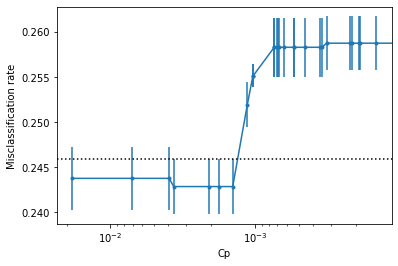

In [109]:
# reproducing plotcp output 
fig,ax = plt.subplots(1,1,figsize=(6,4))
_= ax.errorbar(alphas,1-acc_cv,yerr=acc_se_cv,marker='.')
_ = ax.axhline(y=1-acc_1se_max,linestyle='dotted',color='k',zorder=10)
_ = ax.invert_xaxis() # reverse orders of Cps
_ = ax.semilogx() # plot on log scale
_ = ax.set_xlabel('Cp')
_ = ax.set_ylabel('Misclassification rate')

## Final Model

In [110]:
# prune back initial tree
clf_tree.set_params(ccp_alpha=alphas[idx_1se])
clf_tree._prune_tree()

# class-probabilities - .predict_proba
p_hat = clf_tree.predict_proba(X)
# class predictions - threshold 0.5
y_hat = 1*(p_hat[:,1]>=0.5)

# training metrics
train_acc = accuracy_score(y,y_hat)
print('Training accuracy: %5.3f'% train_acc)

Training accuracy: 0.756


## Visualization

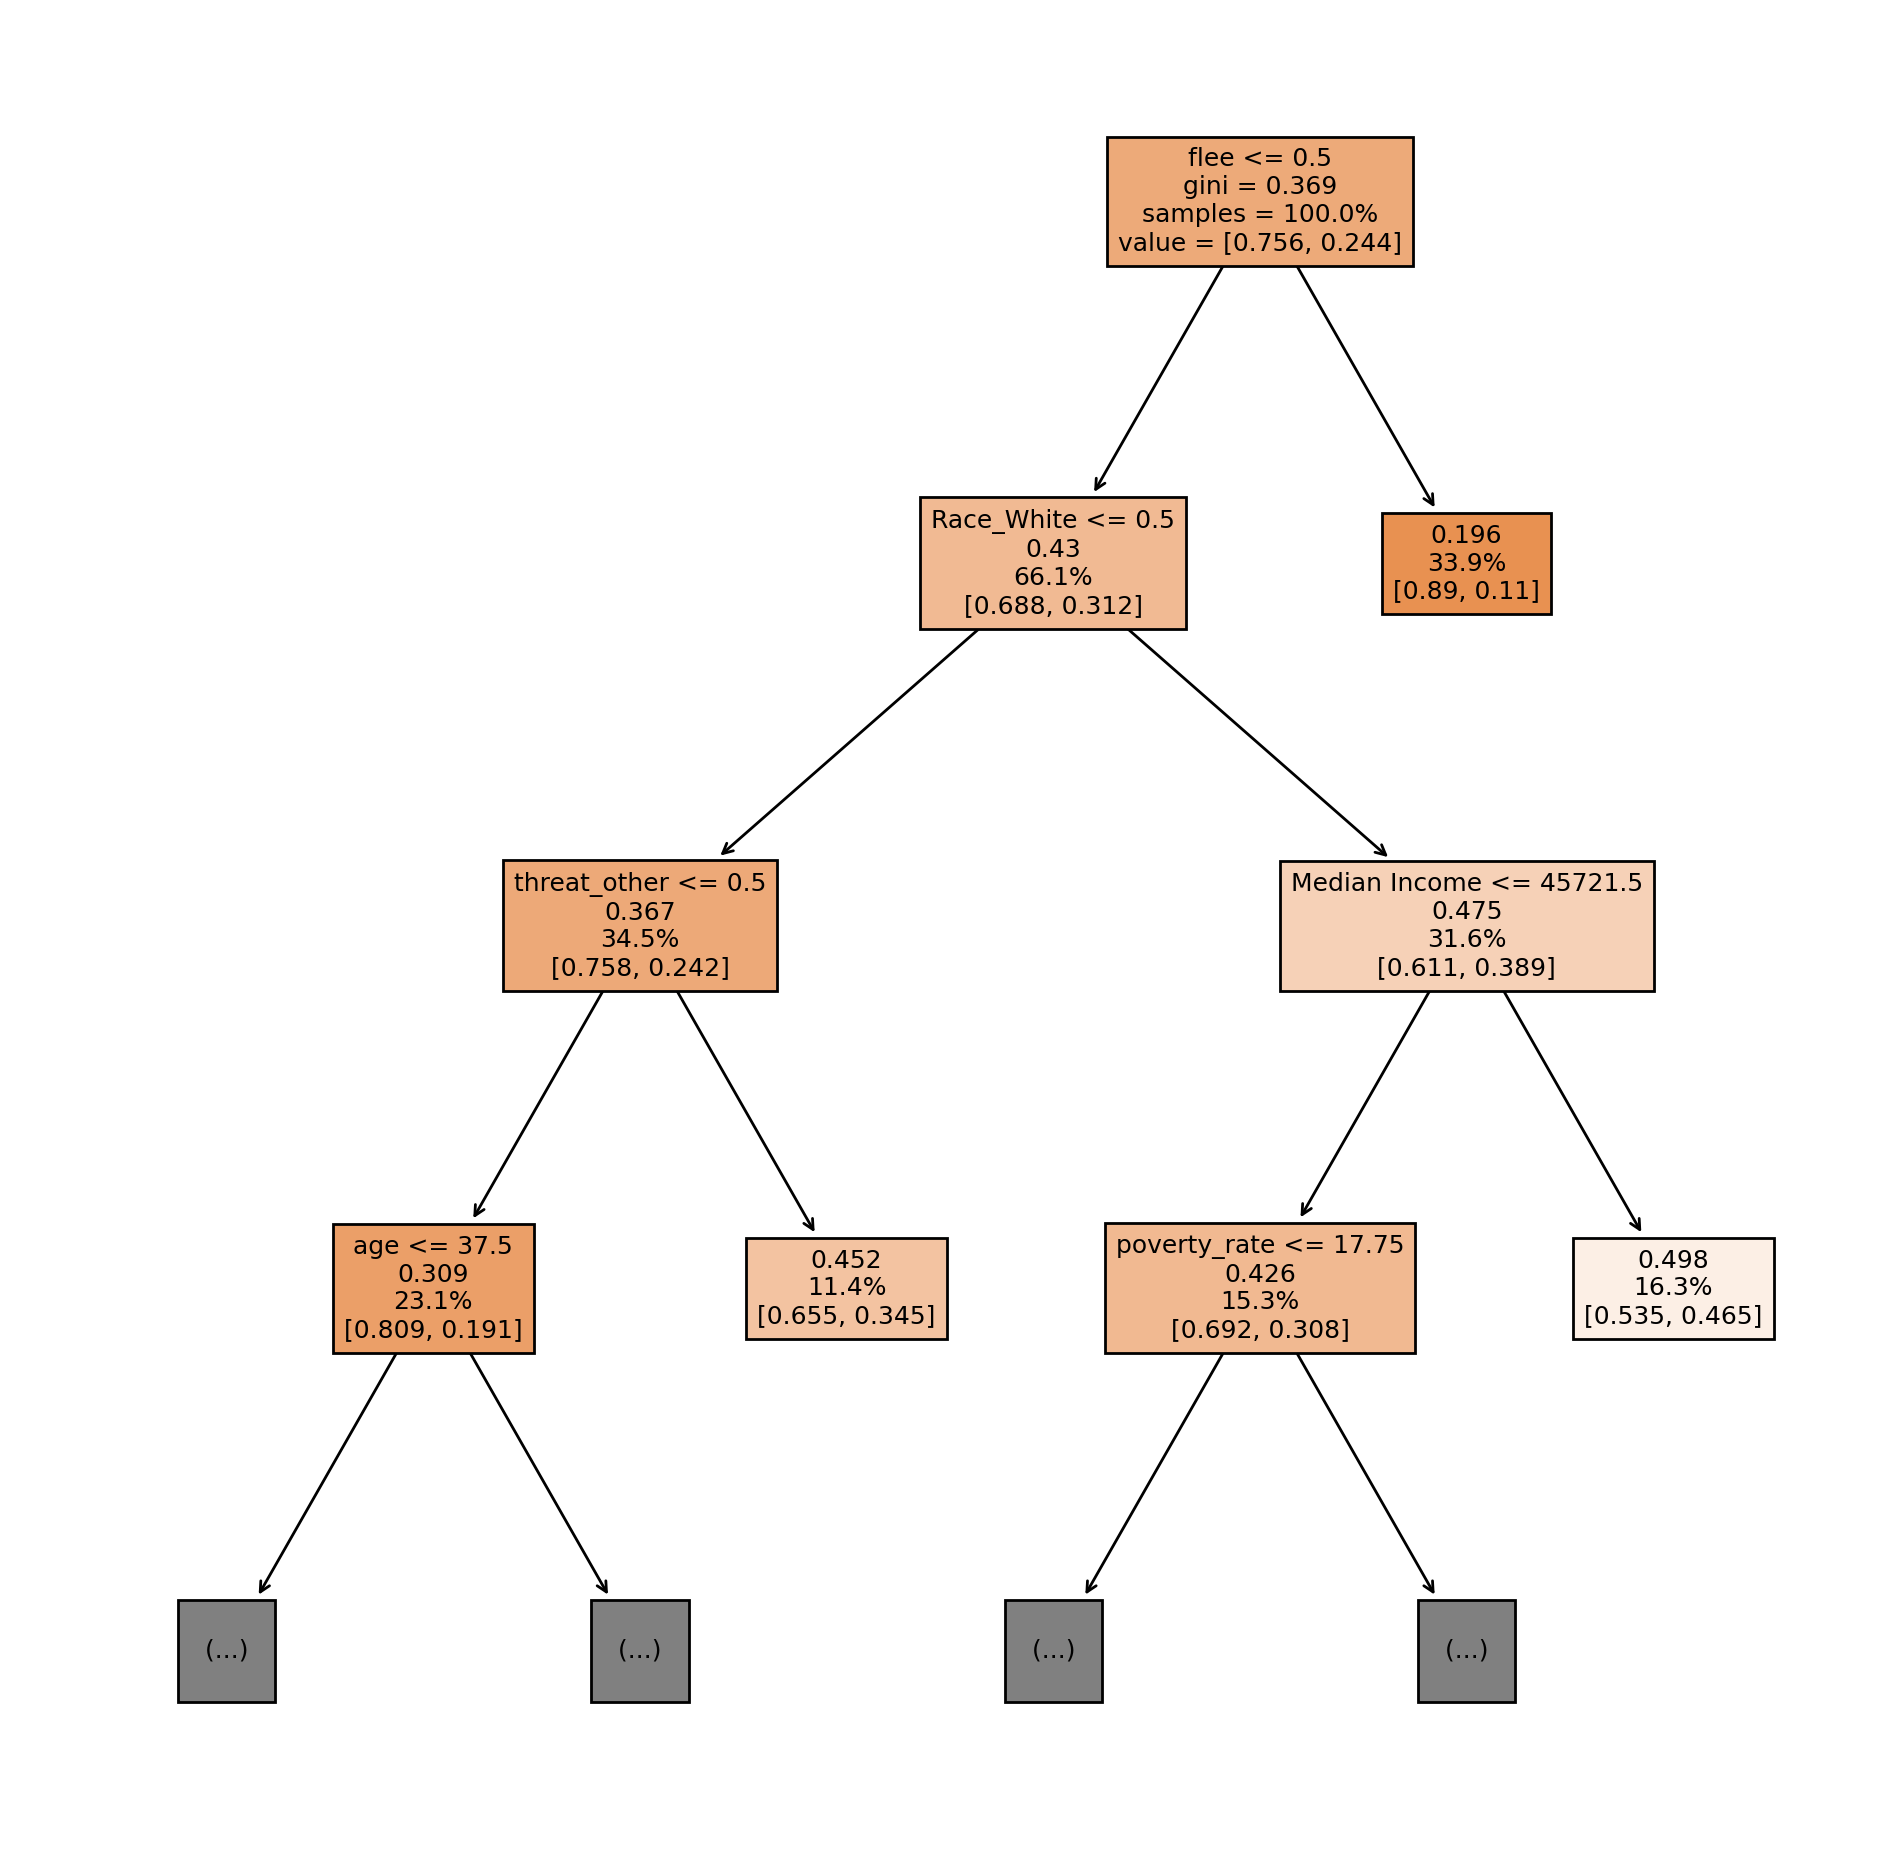

In [112]:
from sklearn.tree import plot_tree
# visualize tree
fig = plt.figure(figsize=(12,12),dpi=200)
_ = plot_tree(
    clf_tree,
    feature_names=x_vars,
    max_depth=3,
    label='root',
    fontsize=9,
    proportion=True,
    filled=True 
)

## Feature importance

In [114]:
# (normalized) total reduction in gini index
feat_imp = clf_tree.feature_importances_
feat_imp

array([0.        , 0.        , 0.03723506, 0.        , 0.47897528,
       0.        , 0.14878887, 0.05444885, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18549175,
       0.        , 0.09506019, 0.        ])

In [116]:
# naming the entries using Pandas series
feat_imp_named = pd.Series(feat_imp,index=x_vars)

# sort in decreasing order of feature importance
feat_imp_named.sort_values(ascending=False).round(4).head(20)

flee                    0.4790
Race_White              0.1855
Median Income           0.1488
threat_other            0.0951
poverty_rate            0.0544
age                     0.0372
manner_of_death         0.0000
Race_Hispanic           0.0000
threat_attack           0.0000
Race_Other              0.0000
Race_Native_American    0.0000
Race_Asian              0.0000
Race_Black              0.0000
armed                   0.0000
percent_completed_hs    0.0000
body_camera             0.0000
gender                  0.0000
threat_undem            0.0000
dtype: float64